In [39]:
import polars as pl
ilp = pl.read_ndjson("results_uv run ipy.py_625.jsonl")
astar = pl.read_ndjson("results_.._astar-astar-bin -i 10_6-2-5.jsonl")
astar.head()

instance,success,total_time,missing,output
struct[3],bool,f64,i64,struct[4]
"{6,[[2, 7], [3, 12]],0}",true,0.000032,0,"{""astar"",true,{[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],[[[4, 1], [5, 1]], [[3, 1], [4, 1]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000032}"
"{6,[[2, 7], [3, 13]],1}",true,0.00003,0,"{""astar"",true,{[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,[[[1, 2], [0, 2]], [[2, 2], [1, 2]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.00003}"
"{6,[[2, 7], [3, 18]],2}",true,0.000026,0,"{""astar"",true,{[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,null,[[[4, 2], [5, 2]], [[3, 2], [4, 2]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000026}"
"{6,[[2, 7], [3, 19]],3}",true,0.000028,0,"{""astar"",true,{[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,null,null,[[[1, 3], [0, 3]], [[2, 3], [1, 3]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000028}"
"{6,[[2, 7], [3, 24]],4}",true,0.000025,0,"{""astar"",true,{[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,null,null,null,[[[4, 3], [5, 3]], [[3, 3], [4, 3]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000025}"


In [40]:
ilp.head()

instance,success,total_time,missing,output
struct[3],bool,f64,i64,struct[4]
"{6,[[2, 7], [3, 12]],0}",true,0.022908,0,"{""ilp"",true,{[[[1, 0], [1, 1]], [[1, 1], [0, 1]]],[[[2, 0], [2, 1]], [[2, 1], [3, 1]], … [[4, 1], [5, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.022908}"
"{6,[[2, 7], [3, 13]],1}",true,0.023477,0,"{""ilp"",true,{[[[1, 0], [1, 1]], [[1, 1], [0, 1]]],null,[[[2, 0], [2, 1]], [[1, 1], [1, 2]], … [[1, 2], [0, 2]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.023477}"
"{6,[[2, 7], [3, 18]],2}",true,0.020834,0,"{""ilp"",true,{[[[1, 0], [1, 1]], [[1, 1], [0, 1]]],null,null,[[[2, 0], [2, 1]], [[2, 1], [3, 1]], … [[4, 2], [5, 2]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.020834}"
"{6,[[2, 7], [3, 19]],3}",true,0.015795,0,"{""ilp"",true,{[[[1, 0], [1, 1]], [[1, 1], [0, 1]]],null,null,null,[[[2, 0], [2, 1]], [[2, 1], [2, 2]], … [[2, 3], [1, 3]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.015795}"
"{6,[[2, 7], [3, 24]],4}",true,0.024732,0,"{""ilp"",true,{[[[1, 0], [1, 1]], [[1, 1], [0, 1]]],null,null,null,null,[[[2, 0], [2, 1]], [[2, 1], [2, 2]], … [[4, 3], [5, 3]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.024732}"


In [41]:
joined = ilp.join(
    astar,
    on="instance",  # The common column to match on
    how="inner",      # The type of join (can be "left", "outer", etc.)
    suffix="_astar"
)
joined.head()

instance,success,total_time,missing,output,success_astar,total_time_astar,missing_astar,output_astar
struct[3],bool,f64,i64,struct[4],bool,f64,i64,struct[4]
"{6,[[2, 7], [3, 12]],0}",true,0.022908,0,"{""ilp"",true,{[[[1, 0], [1, 1]], [[1, 1], [0, 1]]],[[[2, 0], [2, 1]], [[2, 1], [3, 1]], … [[4, 1], [5, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.022908}",true,0.000032,0,"{""astar"",true,{[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],[[[4, 1], [5, 1]], [[3, 1], [4, 1]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000032}"
"{6,[[2, 7], [3, 13]],1}",true,0.023477,0,"{""ilp"",true,{[[[1, 0], [1, 1]], [[1, 1], [0, 1]]],null,[[[2, 0], [2, 1]], [[1, 1], [1, 2]], … [[1, 2], [0, 2]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.023477}",true,0.00003,0,"{""astar"",true,{[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,[[[1, 2], [0, 2]], [[2, 2], [1, 2]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.00003}"
"{6,[[2, 7], [3, 18]],2}",true,0.020834,0,"{""ilp"",true,{[[[1, 0], [1, 1]], [[1, 1], [0, 1]]],null,null,[[[2, 0], [2, 1]], [[2, 1], [3, 1]], … [[4, 2], [5, 2]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.020834}",true,0.000026,0,"{""astar"",true,{[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,null,[[[4, 2], [5, 2]], [[3, 2], [4, 2]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000026}"
"{6,[[2, 7], [3, 19]],3}",true,0.015795,0,"{""ilp"",true,{[[[1, 0], [1, 1]], [[1, 1], [0, 1]]],null,null,null,[[[2, 0], [2, 1]], [[2, 1], [2, 2]], … [[2, 3], [1, 3]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.015795}",true,0.000028,0,"{""astar"",true,{[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,null,null,[[[1, 3], [0, 3]], [[2,

In [42]:
len(joined)

628416

In [43]:
reverse_problemcases = joined.filter(
    (pl.col("success") == False) & (pl.col("success_astar") == True)
)

print(reverse_problemcases)

shape: (0, 9)
┌───────────┬─────────┬────────────┬─────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ instance  ┆ success ┆ total_time ┆ missing ┆ … ┆ success_as ┆ total_time ┆ missing_a ┆ output_as │
│ ---       ┆ ---     ┆ ---        ┆ ---     ┆   ┆ tar        ┆ _astar     ┆ star      ┆ tar       │
│ struct[3] ┆ bool    ┆ f64        ┆ i64     ┆   ┆ ---        ┆ ---        ┆ ---       ┆ ---       │
│           ┆         ┆            ┆         ┆   ┆ bool       ┆ f64        ┆ i64       ┆ struct[4] │
╞═══════════╪═════════╪════════════╪═════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
└───────────┴─────────┴────────────┴─────────┴───┴────────────┴────────────┴───────────┴───────────┘


In [44]:
problemcases = joined.filter(
    (pl.col("success") == True) & (pl.col("success_astar") == False)
)

problemcases

instance,success,total_time,missing,output,success_astar,total_time_astar,missing_astar,output_astar
struct[3],bool,f64,i64,struct[4],bool,f64,i64,struct[4]
"{6,[[2, 18], [3, 19], [13, 33]],6008}",true,0.027224,0,"{""ilp"",true,{null,null,null,null,[[[2, 0], [2, 1]], [[2, 1], [2, 2]], … [[2, 3], [1, 3]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[0, 2], [1, 2]], [[1, 2], [1, 3]], … [[2, 4], [2, 5]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.027224}",false,0.000043,1,"{""astar"",false,{null,null,null,null,[[[1, 3], [0, 3]], [[1, 2], [1, 3]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[2, 4], [2, 5]], [[2, 3], [2, 4]], … [[0, 2], [1, 2]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000043}"
"{6,[[2, 18], [4, 13], [5, 19]],6481}",true,0.031772,0,"{""ilp"",true,{null,null,null,null,null,null,null,null,null,null,null,null,null,[[[3, 0], [3, 1]], [[2, 1], [2, 2]], … [[2, 4], [1, 4]]],null,null,null,null,null,null,null,null,null,null,null,null,[[[4, 0], [4, 1]], [[3, 1], [3, 2]], … [[3, 3], [2, 3]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.031772}",false,0.000051,1,"{""astar"",false,{null,null,null,null,null,null,null,null,null,null,null,null,null,[[[1, 2], [0, 2]], [[2, 2], [1, 2]], … [[3, 0], [3, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000051}"
"{6,[[2, 18], [4, 13], [5, 25]],6483}",true,0.046752,0,"{""ilp"",true,{null,null,null,null,null,null,null,null,null,null,null,null,null,[[[3, 0], [3, 1]], [[3, 1], [3, 2]], … [[3, 3], [2, 3]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[4, 0], [4, 1]], [[4, 1], [4, 2]], … [[3, 4], [2, 4]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.046752}",false,0.000052,1,"{""astar"",false,{null,null,null,null,null,null,null,null,null,null,null,null,null,[[[1, 2], [0, 2]], [[2, 2], [1, 2]], … [[3, 0], [3, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000052}"
"{6,[[2, 18], [4, 13], [5, 32]],6485}",true,0.076385,0,"{""ilp"",true,{null,null,null,null,null,null,null,null,null,null,null,null,null,[[[3, 0], [3, 1]], [[3, 1], [3, 2]], … [[3, 3], [2, 3]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[4, 0], [4, 1]], [[4, 1], [4, 2]], … [[3, 4], [2, 4]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.076385}",false,0.0000

In [45]:
joined.select(pl.sum("total_time"))

total_time
f64
31498.339895


In [46]:
joined.select(pl.sum("total_time_astar"))

total_time_astar
f64
44.834034


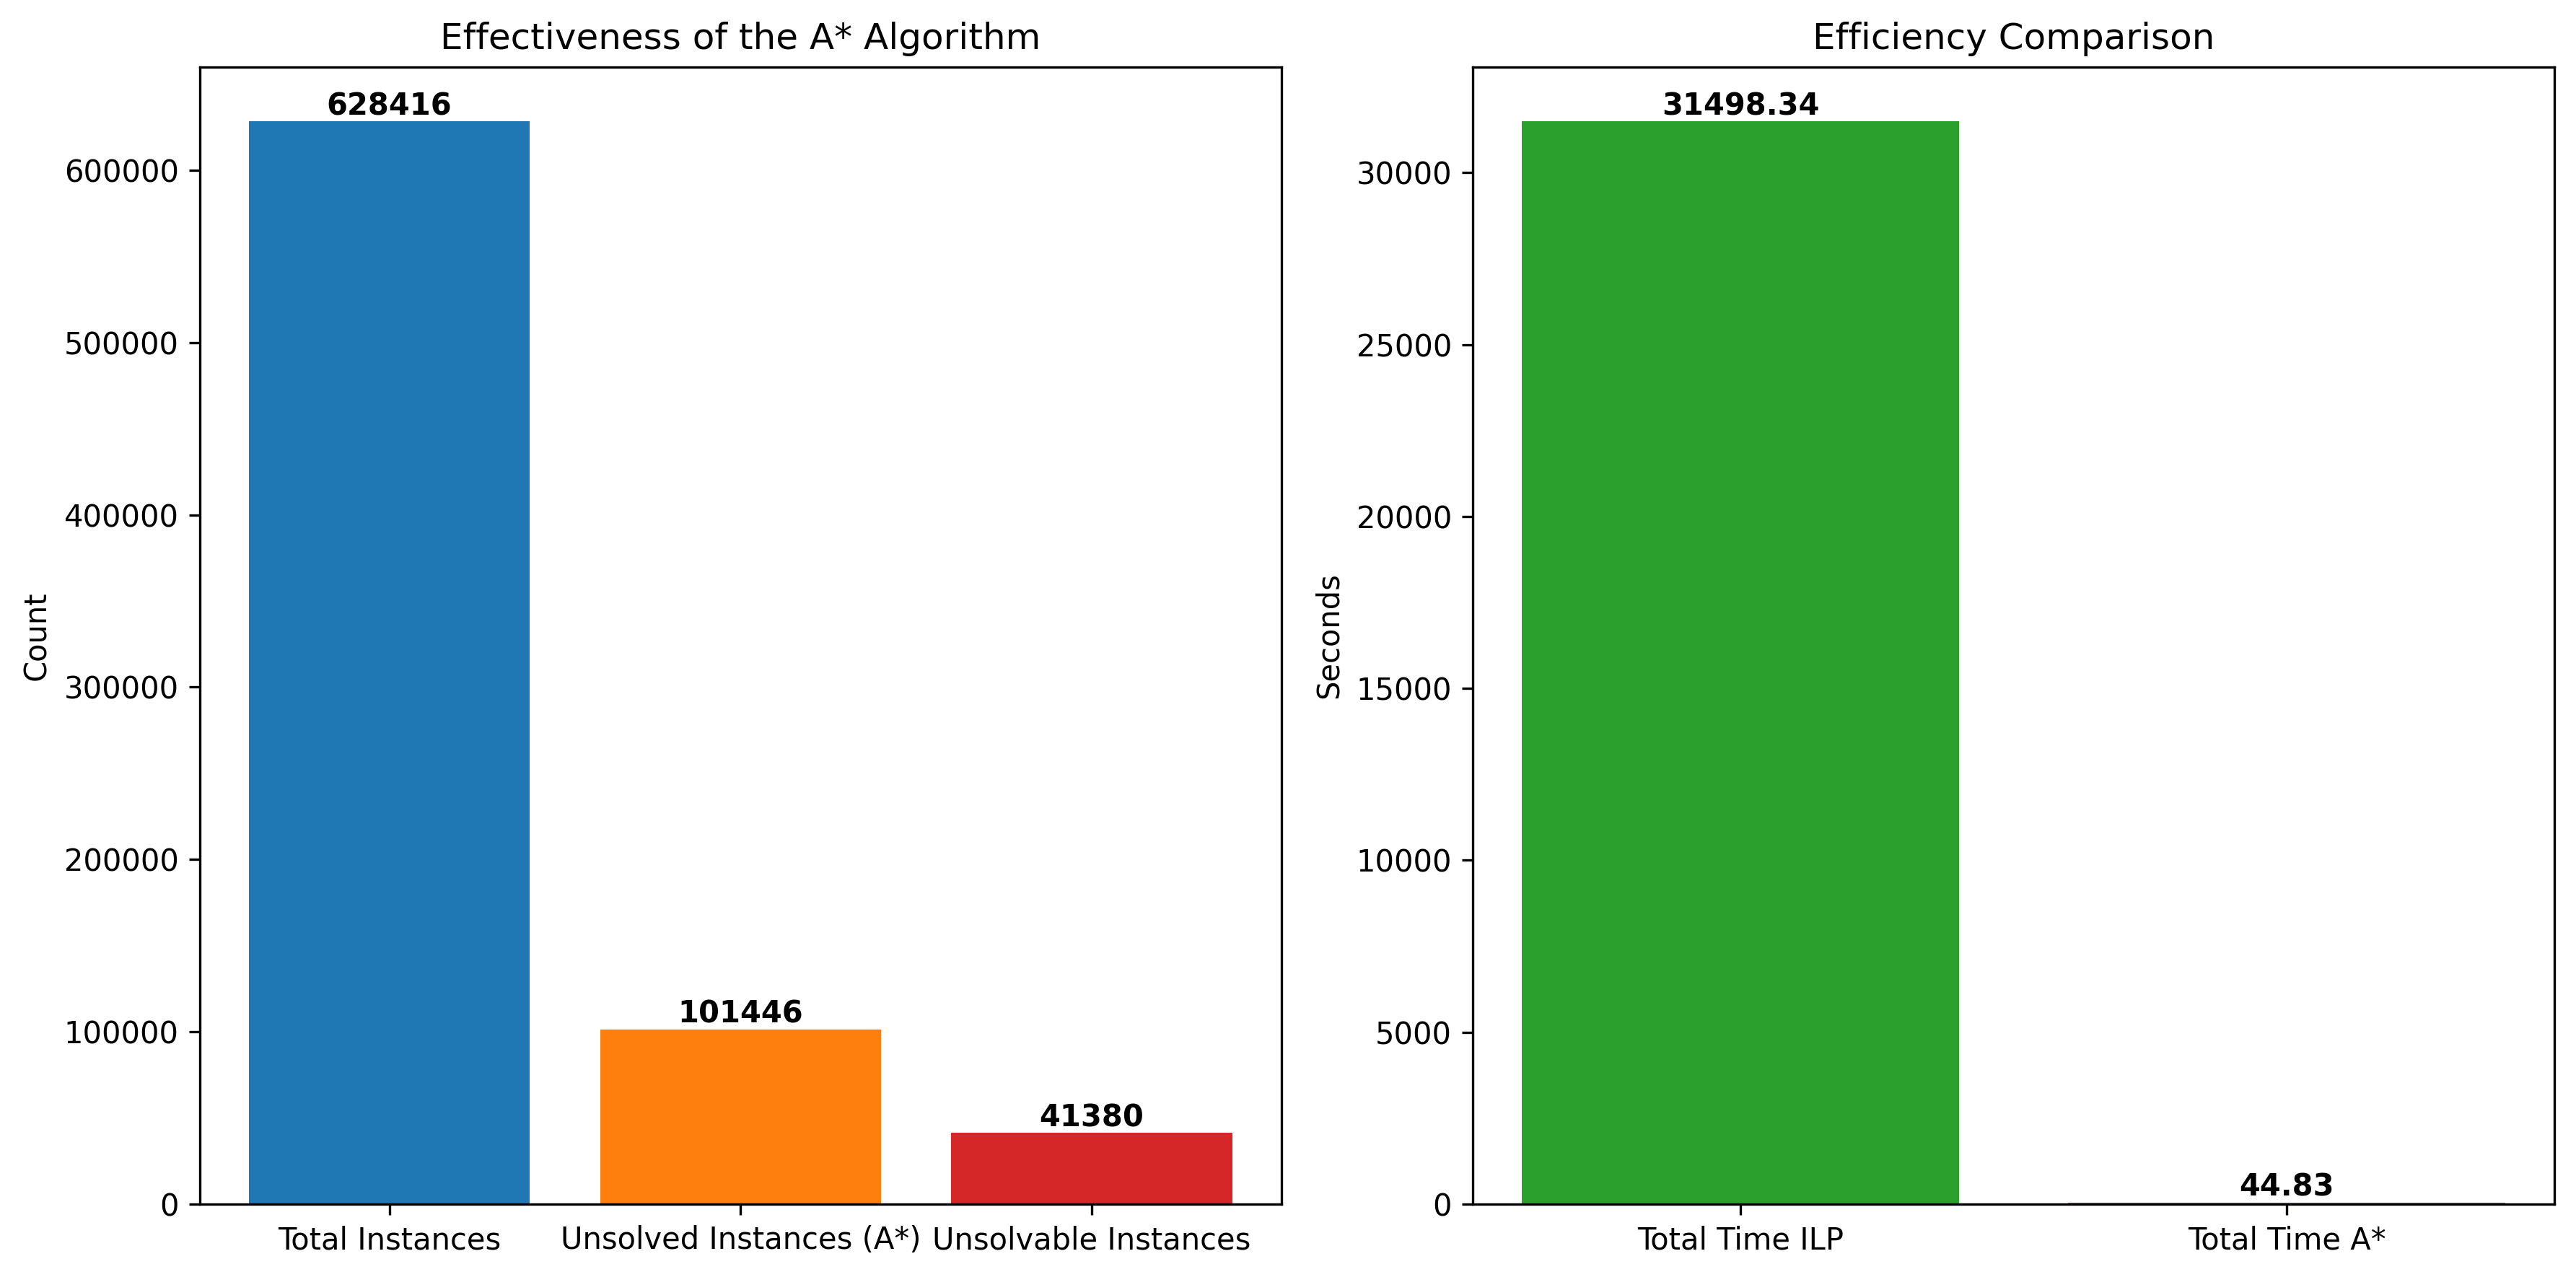

In [47]:
not_solved_astar = joined.filter(
    pl.col("success_astar") == False
)
unsolvable = joined.filter(
    pl.col("success") == False
)
import matplotlib.pyplot as plt
import polars as pl

def plot_performance_comparison(joined, problemcases, not_solved):
    """
    Displays two side-by-side bar plots:
    1. Comparison of dataset lengths (joined, problemcases, not_solved).
    2. Comparison of total time sums (total_time vs total_time_astar).
    
    Parameters:
    - joined: Polars DataFrame containing 'total_time' and 'total_time_astar' columns.
    - problemcases: Polars DataFrame (used for length count).
    - not_solved: Polars DataFrame (used for length count).
    """
    
    # --- Prepare Data for Plot 1 (Counts) ---
    count_labels = ['Total Instances', 'Unsolved Instances (A*)', 'Unsolvable Instances']
    count_values = [len(joined), len(problemcases), len(not_solved)]
    count_colors = ['#1f77b4', '#ff7f0e', '#d62728'] # Blue, Orange, Red

    # --- Prepare Data for Plot 2 (Time Sums) ---
    # We use .item() to extract the scalar value from the resulting 1x1 DataFrame
    total_time_sum = joined.select(pl.sum("total_time")).item()
    astar_time_sum = joined.select(pl.sum("total_time_astar")).item()
    
    time_labels = ['Total Time ILP', 'Total Time A*']
    time_values = [total_time_sum, astar_time_sum]
    time_colors = ['#2ca02c', '#9467bd'] # Green, Purple

    # --- Create Plots ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=300)

    # Plot 1: Dataset Counts
    axes[0].bar(count_labels, count_values, color=count_colors)
    axes[0].set_title('Effectiveness of the A* Algorithm')
    axes[0].set_ylabel('Count')
    
    # Add value labels on top of bars
    for i, v in enumerate(count_values):
        axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

    # Plot 2: Time Comparison
    axes[1].bar(time_labels, time_values, color=time_colors)
    axes[1].set_title('Efficiency Comparison')
    axes[1].set_ylabel('Seconds')

    
    # Add value labels on top of bars
    for i, v in enumerate(time_values):
        axes[1].text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

plot_performance_comparison(joined, not_solved_astar, unsolvable)